In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [2]:
cl = pd.read_csv(r"C:\Users\Gobinath\Downloads\mozilla\claimants.csv")

In [4]:
cl.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [5]:
cl.drop(["CASENUM"],inplace = True,axis = 1)

In [7]:
cl.shape

(1340, 6)

In [8]:
c = cl.dropna()
c.shape

(1096, 6)

In [9]:
c.head(5)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [1]:
x = c.iloc[:,1:]
y = c.iloc[:,0]
print (y)

NameError: name 'c' is not defined

In [13]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = classifier.predict(x)

In [16]:
y_pred_df = pd.DataFrame({'Actual:': y,
                          'predicted:': y_pred})

In [17]:
y_pred_df

,Actual:,predicted:
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[381, 197],
       [123, 395]], dtype=int64)

In [19]:
#accuracy 
((381+395)/(381+395+197+123))

0.708029197080292

In [20]:
0.70*100

70.0

In [21]:
from sklearn.metrics import classification_report
print (classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



Text(0, 0.5, 'True Positive Rate')

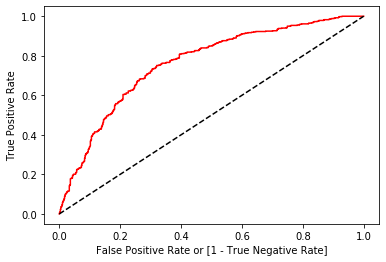

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds =roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')